In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
xiami_music=pd.read_csv('Xiami_Spider/xiami_music.csv')
print(xiami_music.head(5))

   ID                            song_name  song_singer  \
0   0  Up All Night (Jamal's 2015 Version)  Empire Cast   
1   1                                 莫失莫忘          麦振鸿   
2   2                 Got Me Runnin' Round   Nickelback   
3   3                                   青丝         时光胶囊   
4   4                         In Your Skin    Lifehouse   

                                song_url  song_comment_num song_play_num  \
0  http://www.xiami.com/song/mQO5eI82202                21         70123   
1  http://www.xiami.com/song/mQ68N46e4e3               392        543648   
2  http://www.xiami.com/song/8GspPaf3c1c                 7         29158   
3  http://www.xiami.com/song/mQH4op8e667               407        413904   
4  http://www.xiami.com/song/8Ga5wOfc522                12         40108   

            album_name                               album_url album_score  \
0  Empire: Music From     https://www.xiami.com/album/23991330           无   
1          仙剑奇侠传 电视原声带       htt

In [4]:
genre=list(set(xiami_music.album_genre))
#print(genre)
genre_sort=xiami_music.groupby(by='album_genre').count()
genre_sort=genre_sort.sort_values(by='song_name',ascending=False)
#print(genre_sort['song_name'][:20])
genre_frequence=[]
for i in range(1,60):
    #print(genre_sort.index[i],genre_sort['song_name'][i])
    frequece=(genre_sort.index[i],genre_sort['song_name'][i])
    genre_frequence.append(frequece)
print(genre_frequence)

[('流行摇滚 Pop Rock', 113), ('国语流行 Mandarin Pop', 108), ('爵士说唱 Jazz Rap', 53), ('民谣流行 Folk Pop', 41), ('欧美流行 Western Pop', 38), ('原声 Soundtrack', 38), ('流行朋克 Pop Punk', 35), ('后摇 Post-Rock', 32), ('电影原声 Film Score', 28), ('根源唱作人 Singer-Songwriter', 28), ('独立流行 Indie Pop', 24), ('城市民谣 Urban Folk', 24), ('日本流行 J-Pop', 20), ('硬摇滚 Hard Rock', 19), ('轻音乐 Easy Listening', 19), ('独立民谣 Indie Folk', 18), ('重金属 Heavy Metal', 15), ('摇滚 Rock & Roll', 13), ('独立摇滚 Indie Rock', 13), ('当代节奏布鲁斯 Contemporary R&B', 13), ('当代乡村 Contemporary Country', 11), ('当代唱作人 Contemporary Singer-Songwriter', 11), ('流行舞曲 Dance-Pop', 11), ('器乐独奏 Solo Instrumental', 10), ('英式摇滚 Britpop', 9), ('粤语流行 Cantopop', 9), ('基督摇滚 Christian Rock', 9), ('成人时代 Adult Contemporary', 8), ('古典跨界 Classical Crossover', 8), ('新金属 Nu Metal', 7), ('流行说唱 Pop Rap', 7), ('青少年流行 Teen Pop', 6), ('当代民谣 Contemporary Folk', 6), ('另类摇滚 Alternative Rock', 6), ('福音 Gospel', 6), ('当代古典 Modern Classical', 5), ('前卫摇滚 Progressive Rock', 5), ('流行灵魂乐 Pop Soul', 

In [5]:
language_length=list(set(xiami_music['album_language']))
print(language_length)
language=xiami_music.groupby('album_language').count()
language=language.sort_values(by='song_name',ascending=False)
print(language['song_name'][:5])

['丹麦语', '英语', '日语', '中文', '粤语', '国语', '其他', '韩语', '闽南语']
album_language
英语    855
国语    352
日语    178
其他    143
粤语     22
Name: song_name, dtype: int64


In [57]:
language_sort=xiami_music.album_language.value_counts()
#某类别各类别的统计
#所有收藏歌曲里语言的分布
print(language_sort)
language1=list(zip(language_sort.index,language_sort))
#将两个list，两两分装成元组加入list
language2=pd.DataFrame(language1,columns=['language','count'],index=[i+1 for i in range(len(language1))])
print(language1)
print(language2)
language3=xiami_music.album_language.unique()
print(list(language3))

英语     855
国语     352
日语     178
其他     143
粤语      22
中文       7
韩语       6
闽南语      1
丹麦语      1
Name: album_language, dtype: int64
[('英语', 855), ('国语', 352), ('日语', 178), ('其他', 143), ('粤语', 22), ('中文', 7), ('韩语', 6), ('闽南语', 1), ('丹麦语', 1)]
  language  count
1       英语    855
2       国语    352
3       日语    178
4       其他    143
5       粤语     22
6       中文      7
7       韩语      6
8      闽南语      1
9      丹麦语      1
['英语', '国语', '日语', '其他', '粤语', '丹麦语', '中文', '韩语', '闽南语']


In [7]:
album_length=len(list(set(xiami_music['album_name'])))
print(album_length)
album=xiami_music.groupby(by='album_name').count()
album=album.sort_values(by='song_name',ascending=False)
print(album[:20])

1296
                       ID  song_name  song_singer  song_url  song_comment_num  \
album_name                                                                      
君の名は。                  11         11           11        11                11   
众乐纪壹 迷城行歌               7          7            7         7                 7   
理性与感性 作品音乐会             7          7            7         7                 7   
来し方行く末                  7          7            7         7                 7   
demo                    7          7            7         7                 7   
The Black Parade        6          6            6         6                 6   
自传                      6          6            6         6                 6   
后青春期的诗                  5          5            5         5                 5   
浓烟下的诗歌电台                5          5            5         5                 5   
Hopes and Fears         5          5            5         5                 5   
Get Your Heart On!     

In [8]:
singer_length=len(list(set(xiami_music['song_singer'])))
print(singer_length)
singer=xiami_music.groupby(by='song_singer').count()
singer=singer.sort_values(by='song_name',ascending=False)
print(singer['song_name'][:20])

959
song_singer
五月天                    22
OneRepublic            14
RADWIMPS               14
Coldplay               14
陈奕迅                    13
高橋優                    12
Imagine Dragons        11
James Blunt            11
My Chemical Romance    11
陈粒                     10
Nickelback             10
Fall Out Boy           10
Simple Plan            10
李宗盛                     9
Linkin Park             8
金玟岐                     8
The Fray                8
陈鸿宇                     8
Kodaline                6
The Script              6
Name: song_name, dtype: int64


In [9]:
score=xiami_music['album_score']
musci_socre=[]
for s in score:
    if s!='无':
        musci_socre.append(float(s))
print(len(musci_socre))
musci_socre=pd.Series(musci_socre)
print(musci_socre.mean())

1474
9.291316146540032


In [10]:
print(xiami_music.describe())

              ID  song_comment_num
count  1565.0000       1565.000000
mean    782.0000        643.903514
std     451.9209        658.779461
min       0.0000          0.000000
25%     391.0000        125.000000
50%     782.0000        350.000000
75%    1173.0000       1071.000000
max    1564.0000       2000.000000


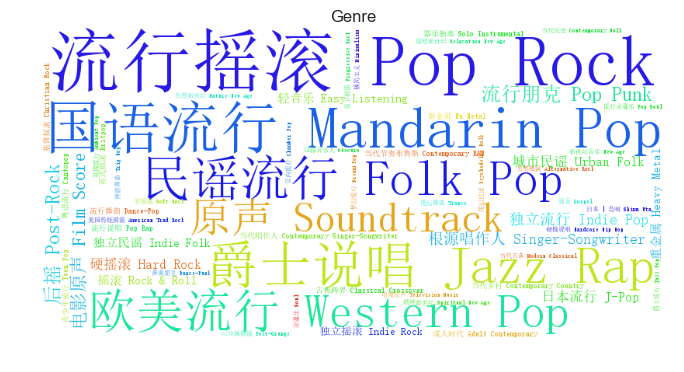

In [11]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

import seaborn as sns
wordcloud = WordCloud(font_path='C:\Windows\Fonts\simsun.ttc',background_color="white",
                      scale=2.0,margin=0,relative_scaling=0.2,prefer_horizontal =0.7,random_state = 2016).\
                fit_words(genre_frequence)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Genre")
plt.show()
wordcloud.to_file("a_new_hope.png")

In [55]:
xiami_music["song_play_num"]=xiami_music["song_play_num"].replace('无','0')#直接用mean，平均数减少了
xiami_music["song_play_num"]=xiami_music["song_play_num"].astype(int)
play_sum=xiami_music["song_play_num"].sum()
print(play_sum)
song_play_num=xiami_music[xiami_music["song_play_num"]>0].__len__()#矩阵的长
print(song_play_num)
song_play_mean=play_sum/song_play_num
print(song_play_mean)

4091834520
1565
2614590.7476


In [45]:
xiami_music["song_play_num"]=xiami_music["song_play_num"].replace(0,song_play_mean)
print(xiami_music["song_play_num"].mean())

2614590.750962773


In [51]:
print(xiami_music.columns)
colums=xiami_music.columns.tolist()
print(colums)

Index(['ID', 'song_name', 'song_singer', 'song_url', 'song_comment_num',
       'song_play_num', 'album_name', 'album_url', 'album_score',
       'album_language', 'album_date', 'album_genre'],
      dtype='object')
['ID', 'song_name', 'song_singer', 'song_url', 'song_comment_num', 'song_play_num', 'album_name', 'album_url', 'album_score', 'album_language', 'album_date', 'album_genre']


In [53]:
xiami_music.describe()

,ID,song_comment_num,song_play_num
count,1565.0000,1565.000000,1.565000e+03
mean,782.0000,643.903514,2.614591e+06
std,451.9209,658.779461,8.355440e+06
min,0.0000,0.000000,1.430000e+02
25%,391.0000,125.000000,2.171120e+05
50%,782.0000,350.000000,7.040900e+05
75%,1173.0000,1071.000000,2.387286e+06
max,1564.0000,2000.000000,2.582567e+08
